In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl

# set font to 15
mpl.rcParams.update({'font.size': 15})

# Set Helvetica font globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']

# Optional: make sure fonts are updated
mpl.rcParams['pdf.fonttype'] = 42  # Avoids Type 3 fonts in PDF output
mpl.rcParams['ps.fonttype'] = 42

In [3]:


db_path = "nerd.sqlite"
rg_ids = [123, 124, 129, 130]  # update if needed

conn = sqlite3.connect(db_path)
conn.row_factory = sqlite3.Row

query = """
SELECT *
FROM probe_tc_fits_view
WHERE fit_kind = 'round3_constrained'
  AND rg_id IN ({})
  AND rt_protocol = 'MRT'
ORDER BY rg_id
""".format(",".join(["?"] * len(rg_ids)))

df = pd.read_sql_query(query, conn, params=rg_ids)
conn.close()
df

,fit_run_id,rg_id,nt_id,fit_kind,rg_label,temperature,probe,probe_conc,rt_protocol,buffer_id,...,buffer_name,nt_site,nt_base,kobs,log_kobs,log_kdeg,log_kobs_err,log_kdeg_err,r2,metadata_json
0,274536,123,797,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,103,G,0.000660,-7.323764,-8.067974,0.296183,0.0,0.487337,"{""base"": ""G"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
1,274537,123,798,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,104,A,0.022931,-3.775280,-8.067974,0.039808,0.0,0.981779,"{""base"": ""A"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
2,274538,123,799,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,105,A,0.017473,-4.047125,-8.067974,0.045539,0.0,0.976153,"{""base"": ""A"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
3,274539,123,800,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,106,U,0.000927,-6.983541,-8.067974,0.267403,0.0,0.538394,"{""base"": ""U"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
4,274540,123,801,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,P4P6_bicine_NoMg,107,U,0.001103,-6.809645,-8.067974,0.144518,0.0,0.799772,"{""base"": ""U"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,275511,124,939,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,245,G,0.000381,-7.873467,-8.242844,0.577642,0.0,0.374830,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."
412,275516,124,944,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,250,G,0.000255,-8.273244,-8.242844,1.030822,0.0,0.158407,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."
413,275517,124,945,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,251,G,0.000253,-8.280811,-8.242844,1.323388,0.0,0.102497,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."
414,275520,124,948,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,P4P6_bicine_5mMMg,254,G,0.000547,-7.510987,-8.242844,0.923467,0.0,0.190010,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,..."


In [4]:
import numpy as np

def calculate_dG(logkobs, logkadd):
    R = 1.9872036e-3  # kcal/(mol*K)
    T = 298.15  # K
    
    logKKp1 = logkobs - logkadd
    KKp1 = np.exp(logKKp1) # K / (K+1)
    K = KKp1 / (1 - KKp1)
    dG = -R * T * np.log(K)

    return dG

logkadd = -2.676278119425211 # logkadd
logkobs_r2_99 = -3.4806204679354953
logkobs_r2_55 = -7.240355294404981
logkobs_r2_39 = -7.503658411920693

dG_r2_99 = calculate_dG(logkobs_r2_99, logkadd)
dG_r2_55 = calculate_dG(logkobs_r2_55, logkadd)
dG_r2_39 = calculate_dG(logkobs_r2_39, logkadd)

print(f"dG for r2=0.99: {dG_r2_99:.2f} kcal/mol")
print(f"dG for r2=0.55: {dG_r2_55:.2f} kcal/mol")
print(f"dG for r2=0.39: {dG_r2_39:.2f} kcal/mol")

dG for r2=0.99: 0.13 kcal/mol
dG for r2=0.55: 2.70 kcal/mol
dG for r2=0.39: 2.86 kcal/mol


/var/folders/k7/k3x4cyj90rz6_py6pr8yth9m0000gn/T/ipykernel_31098/3988759731.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


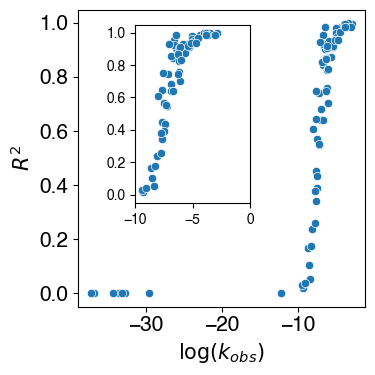

In [5]:
# filter to nt_base = C
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df_c = df[df['nt_base'] == 'C']

fig, ax = plt.subplots(figsize=(4, 4))

# Main scatter plot
sns.scatterplot(data=df_c, x='log_kobs', y='r2', ax=ax)

# Create inset: width, height as %, and location
inset_ax = inset_axes(
    ax,
    width="40%", height="60%",
    loc='upper left',
    bbox_to_anchor=(0.2, -0.05, 1, 1),   # shift right by increasing first value
    bbox_transform=ax.transAxes,
    borderpad=0
)
# Plot same data in inset
sns.scatterplot(data=df_c, x='log_kobs', y='r2', ax=inset_ax)

# Zoom limits for inset
inset_ax.set_xlim(-10, 0)

# Optional: tighten inset ticks
inset_ax.tick_params(axis='both', labelsize=10)

# remove inset axes labels
inset_ax.set_xlabel('')
inset_ax.set_ylabel('')

# set main axes labels
ax.set_xlabel(r'$\log(k_{obs})$')
ax.set_ylabel(r'$R^2$')

plt.tight_layout()
#plt.savefig("exports/r2_v_log_kobs_p4p6_C.pdf")
plt.show()

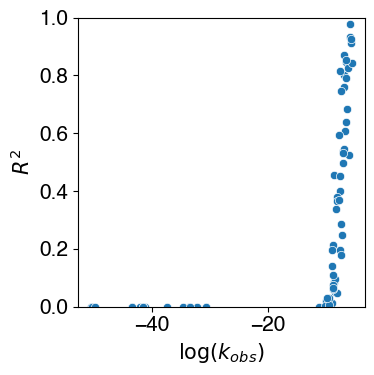

In [6]:
# filter to nt_base = C
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df_c = df[df['nt_base'] == 'U']

fig, ax = plt.subplots(figsize=(4, 4))

# Main scatter plot
sns.scatterplot(data=df_c, x='log_kobs', y='r2', ax=ax)

# set main axes labels
ax.set_xlabel(r'$\log(k_{obs})$')
ax.set_ylabel(r'$R^2$')

# set y lim of both 0 to 1
ax.set_ylim(0, 1)

plt.tight_layout()
#plt.savefig("exports/r2_v_log_kobs_p4p6_A.pdf")
plt.show()

In [7]:
# get max log_kobs for each nt_base and save in dict
max_logkobs = {}
for base in df['nt_base'].unique():
    df_base = df[df['nt_base'] == base]
    max_logkobs[base] = df_base['log_kobs'].max()
max_logkobs

def calc_dG(logkobs, logkadd):
    R = 1.9872036e-3  # kcal/(mol*K)
    T = 298.15  # K
    
    logKKp1 = logkobs - logkadd
    KKp1 = np.exp(logKKp1) # K / (K+1)
    K = KKp1 / (1 - KKp1)
    dG = -R * T * np.log(K)

    return dG


# calculate dG using base-specific max log_kobs

df['dG'] = df.apply(lambda row: calc_dG(row['log_kobs'], max_logkobs[row['nt_base']]), axis=1)
df

/var/folders/k7/k3x4cyj90rz6_py6pr8yth9m0000gn/T/ipykernel_31098/2864220084.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  K = KKp1 / (1 - KKp1)


,fit_run_id,rg_id,nt_id,fit_kind,rg_label,temperature,probe,probe_conc,rt_protocol,buffer_id,...,nt_site,nt_base,kobs,log_kobs,log_kdeg,log_kobs_err,log_kdeg_err,r2,metadata_json,dG
0,274536,123,797,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,103,G,0.000660,-7.323764,-8.067974,0.296183,0.0,0.487337,"{""base"": ""G"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ...",1.337060
1,274537,123,798,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,104,A,0.022931,-3.775280,-8.067974,0.039808,0.0,0.981779,"{""base"": ""A"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ...",0.411026
2,274538,123,799,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,105,A,0.017473,-4.047125,-8.067974,0.045539,0.0,0.976153,"{""base"": ""A"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ...",0.638676
3,274539,123,800,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,106,U,0.000927,-6.983541,-8.067974,0.267403,0.0,0.538394,"{""base"": ""U"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ...",0.743259
4,274540,123,801,round3_constrained,1,23.0,etoh,0.015853,MRT,2,...,107,U,0.001103,-6.809645,-8.067974,0.144518,0.0,0.799772,"{""base"": ""U"", ""fmod_run_ids"": [1, 2, 3, 4, 5, ...",0.607229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,275511,124,939,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,245,G,0.000381,-7.873467,-8.242844,0.577642,0.0,0.374830,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,...",1.688418
412,275516,124,944,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,250,G,0.000255,-8.273244,-8.242844,1.030822,0.0,0.158407,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,...",1.936470
413,275517,124,945,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,251,G,0.000253,-8.280811,-8.242844,1.323388,0.0,0.102497,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,...",1.941123
414,275520,124,948,round3_constrained,2,23.0,etoh,0.015853,MRT,3,...,254,G,0.000547,-7.510987,-8.242844,0.923467,0.0,0.190010,"{""base"": ""G"", ""fmod_run_ids"": [44, 45, 46, 47,...",1.458484


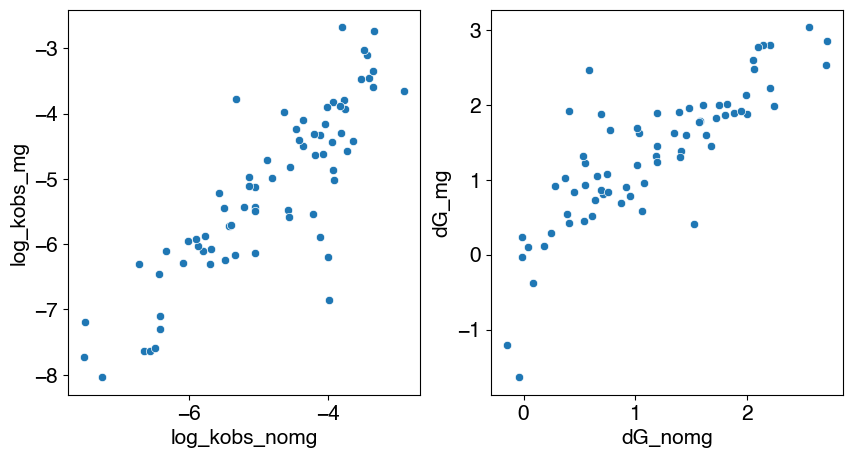

In [8]:
## Analysis of correlation

def keep_higher_r2(df):
    for site in df['nt_site'].unique():
        # drop row with lower r2
        df_site = df[df['nt_site'] == site]
        if len(df_site) != 2:
            continue
        if df_site.iloc[0]['r2'] > df_site.iloc[1]['r2']:
            df = df.drop(df_site.index[1])
        else:
            df = df.drop(df_site.index[0])
    return df


df_nomg = df[df['buffer_id'] == 2]
df_nomg = keep_higher_r2(df_nomg)
df_mg = df[df['buffer_id'] == 3]
df_mg = keep_higher_r2(df_mg)
df_mg

# merge df_nomg and df_mg on nt_site and keep the following: nt_site, nt_base, log_kobs, log_kobs_err, dG, r2
# add suffix to all but nt_site and nt_base
df_merged = pd.merge(df_nomg[['nt_site', 'nt_base', 'log_kobs', 'log_kobs_err', 'dG', 'r2']],
                     df_mg[['nt_site', 'log_kobs', 'log_kobs_err', 'dG', 'r2']],
                     on=['nt_site'],
                     suffixes=('_nomg', '_mg'))

# filter to A and C only
df_merged_AC = df_merged[df_merged['nt_base'].isin(['A', 'C'])]

# filter to R2 > 0
df_merged_AC = df_merged_AC[(df_merged_AC['r2_nomg'] > 0.3) & (df_merged_AC['r2_mg'] > 0.3)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df_merged_AC, x='log_kobs_nomg', y='log_kobs_mg', ax=axs[0])
sns.scatterplot(data=df_merged_AC, x='dG_nomg', y='dG_mg', ax=axs[1])
plt.show()

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_merged_AC['log_kobs_nomg'],
    df_merged_AC['log_kobs_mg']
)

# Predicted y-values
x = df_merged_AC['log_kobs_nomg']
y_pred = intercept + slope * x

# Residuals
residuals = df_merged_AC['log_kobs_mg'] - y_pred

# Standard deviation of residuals (σ)
sigma = residuals.std()

# R2 value
r2 = r_value**2
r2

slope, intercept, sigma

(np.float64(0.9923045687513479),
 np.float64(-0.35318668004097464),
 np.float64(0.6738925660204269))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


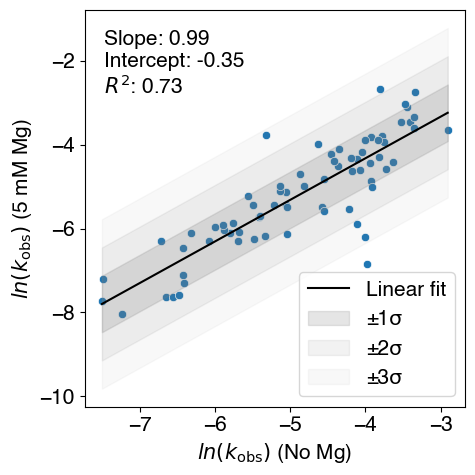

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=df_merged_AC,
    x='log_kobs_nomg',
    y='log_kobs_mg',
    ax=ax
)

# Regression line
x_line = np.linspace(x.min(), x.max(), 200)
y_line = intercept + slope * x_line
ax.plot(x_line, y_line, color='black', label='Linear fit')

# ±1σ band
ax.fill_between(
    x_line,
    y_line - sigma,
    y_line + sigma,
    color='gray',
    alpha=0.2,
    label='±1σ'
)

# ±2σ band
ax.fill_between(
    x_line,
    y_line - 2*sigma,
    y_line + 2*sigma,
    color='gray',
    alpha=0.1,
    label='±2σ'
)

# ±3σ band
ax.fill_between(
    x_line,
    y_line - 3*sigma,
    y_line + 3*sigma,
    color='gray',
    alpha=0.05,
    label='±3σ'
)

ax.set_xlabel(r'$ln(k_{\text{obs}})$ (No Mg)')
ax.set_ylabel(r'$ln(k_{\text{obs}})$ (5 mM Mg)')

# annotate slope, intercept, r2
ax.text(
    0.05, 0.95,
    f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\n$R^2$: {r2:.2f}',
    transform=ax.transAxes,
    verticalalignment='top'
    )

# legend bottom right
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("exports/log_kobs_nomg_v_log_kobs_mg_p4p6_AC.pdf")
plt.show()

In [11]:
# residuals
df_merged_AC['residual'] = df_merged_AC['log_kobs_mg'] - y_pred

# absolute residual distance
df_merged_AC['abs_residual'] = df_merged_AC['residual'].abs()

# classification
df_merged_AC['sigma_class'] = np.where(
    df_merged_AC['abs_residual'] <= sigma, 'within_1sigma',
    np.where(
        df_merged_AC['abs_residual'] <= 2*sigma, 'within_2sigma',
        'outside_2sigma'
    )
)
df_merged_AC.to_csv("exports/log_kobs_nomg_v_log_kobs_mg_p4p6_AC_with_residuals.csv", index=False)

In [12]:
df_within_1sigma = df_merged_AC[df_merged_AC['sigma_class'] == 'within_1sigma']
df_within_1sigma

,nt_site,nt_base,log_kobs_nomg,log_kobs_err_nomg,dG_nomg,r2_nomg,log_kobs_mg,log_kobs_err_mg,dG_mg,r2_mg,residual,abs_residual,sigma_class
0,104,A,-3.775280,0.039808,0.411026,0.981779,-3.795475,0.071300,0.428881,0.975766,0.303939,0.303939,within_1sigma
1,105,A,-4.047125,0.045539,0.638676,0.976153,-4.165104,0.077981,0.730599,0.971924,0.204063,0.204063,within_1sigma
4,109,C,-4.365995,0.035195,0.707925,0.985545,-4.499681,0.083820,0.809164,0.966432,0.185902,0.185902,within_1sigma
5,113,A,-4.182189,0.028209,0.743639,0.990689,-4.636739,0.095737,1.071636,0.956610,-0.133547,0.133547,within_1sigma
6,114,A,-3.406555,0.027499,0.043210,0.991309,-3.458740,0.033007,0.101494,0.994756,0.274786,0.274786,within_1sigma
7,115,A,-3.356725,0.023816,-0.015146,0.993482,-3.345197,0.045800,-0.029066,0.989993,0.338884,0.338884,within_1sigma
9,121,C,-5.052206,0.053141,1.197467,0.967432,-5.431401,0.136899,1.446407,0.914677,-0.064887,0.064887,within_1sigma
10,122,A,-3.927017,0.032578,0.541208,0.987678,-3.825255,0.085504,0.454894,0.965486,0.424728,0.424728,within_1sigma
11,123,A,-3.726423,0.016077,0.367066,0.996984,-4.567566,0.063790,1.023658,0.980265,-0.516633,0.516633,within_1sigma
12,124,C,-2.906675,0.020932,-inf,0.995063,-3.648200,0.054227,0.056003,0.985900,-0.410706,0.410706,within_1sigma


In [13]:
df_within_2sigma = df_merged_AC[df_merged_AC['sigma_class'] == 'within_2sigma']
df_within_2sigma

,nt_site,nt_base,log_kobs_nomg,log_kobs_err_nomg,dG_nomg,r2_nomg,log_kobs_mg,log_kobs_err_mg,dG_mg,r2_mg,residual,abs_residual,sigma_class
15,128,C,-6.648599,0.062301,2.202817,0.955552,-7.638700,0.332395,2.798410,0.644252,-0.688078,0.688078,within_2sigma
23,137,C,-6.554398,0.091467,2.145581,0.908889,-7.637616,0.621631,2.797763,0.341122,-0.780470,0.780470,within_2sigma
47,170,C,-3.480620,0.013517,-0.150823,0.997882,-3.029518,0.058445,-1.205588,0.984012,0.777504,0.777504,within_2sigma
56,184,A,-4.223345,0.045475,0.774794,0.976146,-5.535473,0.096469,1.659059,0.955715,-0.991442,0.991442,within_2sigma
59,187,A,-3.915590,0.031075,0.531701,0.988777,-5.011393,0.074330,1.323198,0.973295,-0.772748,0.772748,within_2sigma
73,207,A,-3.337089,0.026591,-0.038958,0.991888,-2.737507,0.090631,-1.636664,0.963094,0.927089,0.927089,within_2sigma
81,217,C,-5.047778,0.057393,1.194495,0.962225,-6.132993,0.137418,1.887541,0.913892,-0.770873,0.770873,within_2sigma
83,219,A,-4.626667,0.038944,1.064685,0.982304,-3.981636,0.057379,0.586070,0.984114,0.962613,0.962613,within_2sigma
86,223,C,-6.478171,0.093708,2.099161,0.904813,-7.595464,0.259412,2.772561,0.748324,-0.813958,0.813958,within_2sigma
88,225,A,-4.554449,0.022278,1.014494,0.994144,-5.576982,0.189073,1.685115,0.848853,-0.704395,0.704395,within_2sigma


In [14]:
df_outside_2sigma = df_merged_AC[df_merged_AC['sigma_class'] == 'outside_2sigma']
df_outside_2sigma

,nt_site,nt_base,log_kobs_nomg,log_kobs_err_nomg,dG_nomg,r2_nomg,log_kobs_mg,log_kobs_err_mg,dG_mg,r2_mg,residual,abs_residual,sigma_class
50,173,A,-5.327372,0.030456,1.527370,0.989046,-3.773447,0.022122,0.409396,0.997617,1.866115,1.866115,outside_2sigma
58,186,A,-3.982814,0.023949,0.587027,0.993296,-6.852766,0.116268,2.465339,0.936750,-2.547415,2.547415,outside_2sigma
65,197,C,-4.001763,0.013777,0.407544,0.997771,-6.191953,0.143520,1.923874,0.906801,-1.867799,1.867799,outside_2sigma
66,198,A,-3.803288,0.024640,0.435741,0.992934,-2.676278,0.042773,-inf,0.991569,1.450929,1.450929,outside_2sigma
107,248,A,-4.118782,0.023516,0.694912,0.993517,-5.888604,0.066647,1.878905,0.978335,-1.448331,1.448331,outside_2sigma


In [15]:
# dG version

df_merged_AC_dG = df_merged_AC.dropna(subset=['dG_nomg', 'dG_mg'])
bad = ~np.isfinite(df_merged_AC_dG['dG_nomg']) | ~np.isfinite(df_merged_AC_dG['dG_mg'])
df_merged_AC_dG = df_merged_AC_dG[~bad]  # or drop/clean those rows

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_merged_AC_dG['dG_nomg'],
    df_merged_AC_dG['dG_mg']
)

slope, intercept, sigma

(np.float64(1.027563253747637),
 np.float64(0.15695071702055907),
 np.float64(0.6738925660204269))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


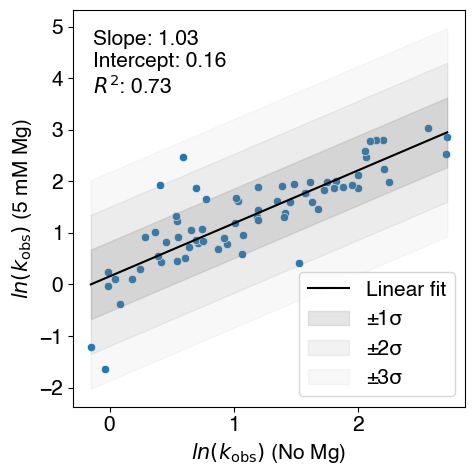

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=df_merged_AC_dG,
    x='dG_nomg',
    y='dG_mg',
    ax=ax
)

# Regression line
x_line = np.linspace(df_merged_AC_dG['dG_nomg'].min(), df_merged_AC_dG['dG_nomg'].max(), 200)
y_line = intercept + slope * x_line
ax.plot(x_line, y_line, color='black', label='Linear fit')

# ±1σ band
ax.fill_between(
    x_line,
    y_line - sigma,
    y_line + sigma,
    color='gray',
    alpha=0.2,
    label='±1σ'
)

# ±2σ band
ax.fill_between(
    x_line,
    y_line - 2*sigma,
    y_line + 2*sigma,
    color='gray',
    alpha=0.1,
    label='±2σ'
)

# ±3σ band
ax.fill_between(
    x_line,
    y_line - 3*sigma,
    y_line + 3*sigma,
    color='gray',
    alpha=0.05,
    label='±3σ'
)

ax.set_xlabel(r'$ln(k_{\text{obs}})$ (No Mg)')
ax.set_ylabel(r'$ln(k_{\text{obs}})$ (5 mM Mg)')

# annotate slope, intercept, r2
ax.text(
    0.05, 0.95,
    f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\n$R^2$: {r2:.2f}',
    transform=ax.transAxes,
    verticalalignment='top'
    )

# legend bottom right
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("exports/dG_nomg_v_dG_mg_p4p6_AC.pdf")
plt.show()

In [17]:
y_pred = intercept + slope * df_merged_AC_dG['dG_nomg']

# residuals
df_merged_AC_dG['residual'] = df_merged_AC_dG['dG_mg'] - y_pred

# absolute residual distance
df_merged_AC_dG['abs_residual'] = df_merged_AC_dG['residual'].abs()

# classification
df_merged_AC_dG['sigma_class'] = np.where(
    df_merged_AC_dG['abs_residual'] <= sigma, 'within_1sigma',
    np.where(
        df_merged_AC_dG['abs_residual'] <= 2*sigma, 'within_2sigma',
        'outside_2sigma'
    )
)
df_merged_AC_dG.to_csv("exports/dG_nomg_v_dG_mg_p4p6_AC_with_residuals.csv", index=False)

<Axes: >

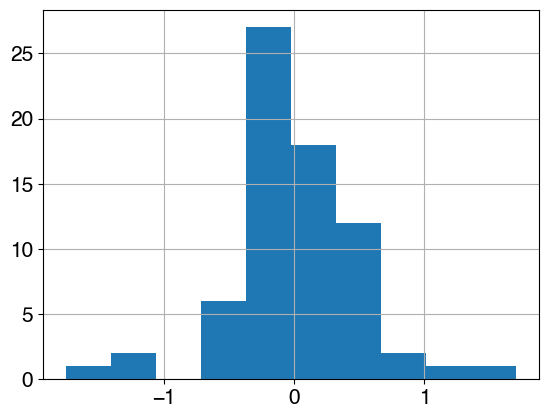

In [19]:
df_merged_AC_dG['residual'].hist()

In [20]:
# filter to within 1 sigma
df_within_1sigma = df_merged_AC_dG[df_merged_AC_dG['sigma_class'] == 'within_1sigma']

# linear regression on within 1 sigma
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_within_1sigma['dG_nomg'],
    df_within_1sigma['dG_mg']
)

# Predicted y-values
x = df_merged_AC_dG['log_kobs_nomg']
y_pred = intercept + slope * x

# Residuals
residuals = df_merged_AC_dG['log_kobs_mg'] - y_pred

# Standard deviation of residuals (σ)
sigma = residuals.std()

# R2 value
r2 = r_value**2

slope, intercept, sigma

(np.float64(1.0138996095632256),
 np.float64(0.16580996290225403),
 np.float64(0.6596761921561437))

In [21]:
df_within_1sigma

,nt_site,nt_base,log_kobs_nomg,log_kobs_err_nomg,dG_nomg,r2_nomg,log_kobs_mg,log_kobs_err_mg,dG_mg,r2_mg,residual,abs_residual,sigma_class
0,104,A,-3.775280,0.039808,0.411026,0.981779,-3.795475,0.071300,0.428881,0.975766,-0.150425,0.150425,within_1sigma
1,105,A,-4.047125,0.045539,0.638676,0.976153,-4.165104,0.077981,0.730599,0.971924,-0.082632,0.082632,within_1sigma
4,109,C,-4.365995,0.035195,0.707925,0.985545,-4.499681,0.083820,0.809164,0.966432,-0.075225,0.075225,within_1sigma
5,113,A,-4.182189,0.028209,0.743639,0.990689,-4.636739,0.095737,1.071636,0.956610,0.150549,0.150549,within_1sigma
6,114,A,-3.406555,0.027499,0.043210,0.991309,-3.458740,0.033007,0.101494,0.994756,-0.099857,0.099857,within_1sigma
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,262,A,-4.551276,0.056110,1.012275,0.963976,-4.814791,0.059075,1.192756,0.982990,-0.004371,0.004371,within_1sigma
118,263,C,-6.721343,0.215547,2.246925,0.642335,-6.297629,0.260076,1.988792,0.747605,-0.477017,0.477017,within_1sigma
119,264,C,-7.503658,0.360410,2.717639,0.390958,-7.729585,0.572844,2.852716,0.378754,-0.096781,0.096781,within_1sigma
120,265,A,-6.427110,0.171735,2.208222,0.738889,-6.461498,0.181311,2.229078,0.859019,-0.196961,0.196961,within_1sigma


In [22]:
df_merged_AC_dG[['nt_site', 'nt_base', 'dG_nomg', 'dG_mg']]

,nt_site,nt_base,dG_nomg,dG_mg
0,104,A,0.411026,0.428881
1,105,A,0.638676,0.730599
4,109,C,0.707925,0.809164
5,113,A,0.743639,1.071636
6,114,A,0.043210,0.101494
...,...,...,...,...
117,262,A,1.012275,1.192756
118,263,C,2.246925,1.988792
119,264,C,2.717639,2.852716
120,265,A,2.208222,2.229078


In [23]:
df_within_2sigma = df_merged_AC_dG[df_merged_AC_dG['sigma_class'] == 'within_2sigma']
df_within_2sigma[['nt_site', 'nt_base', 'dG_nomg', 'dG_mg']]

,nt_site,nt_base,dG_nomg,dG_mg
47,170,C,-0.150823,-1.205588
50,173,A,1.527370,0.409396
56,184,A,0.774794,1.659059
107,248,A,0.694912,1.878905


In [24]:
df_outside_2sigma = df_merged_AC_dG[df_merged_AC_dG['sigma_class'] == 'outside_2sigma']
df_outside_2sigma[['nt_site', 'nt_base', 'dG_nomg', 'dG_mg']]

,nt_site,nt_base,dG_nomg,dG_mg
58,186,A,0.587027,2.465339
65,197,C,0.407544,1.923874
73,207,A,-0.038958,-1.636664


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


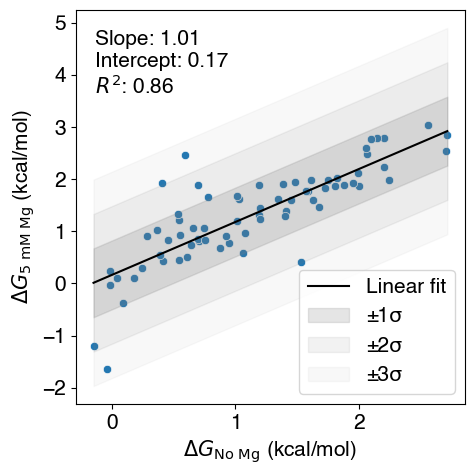

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=df_merged_AC_dG,
    x='dG_nomg',
    y='dG_mg',
    ax=ax
)

# Regression line
x_line = np.linspace(df_merged_AC_dG['dG_nomg'].min(), df_merged_AC_dG['dG_nomg'].max(), 200)
y_line = intercept + slope * x_line
ax.plot(x_line, y_line, color='black', label='Linear fit')

# ±1σ band
ax.fill_between(
    x_line,
    y_line - sigma,
    y_line + sigma,
    color='gray',
    alpha=0.2,
    label='±1σ'
)

# ±2σ band
ax.fill_between(
    x_line,
    y_line - 2*sigma,
    y_line + 2*sigma,
    color='gray',
    alpha=0.1,
    label='±2σ'
)

# ±3σ band
ax.fill_between(
    x_line,
    y_line - 3*sigma,
    y_line + 3*sigma,
    color='gray',
    alpha=0.05,
    label='±3σ'
)

ax.set_xlabel(r'$\Delta G_{\text{No Mg}}$ (kcal/mol)')
ax.set_ylabel(r'$\Delta G_{\text{5 mM Mg}}$ (kcal/mol)')

# annotate slope, intercept, r2
ax.text(
    0.05, 0.95,
    f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\n$R^2$: {r2:.2f}',
    transform=ax.transAxes,
    verticalalignment='top'
    )

# legend bottom right
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("exports/dG_nomg_v_dG_mg_p4p6_AC_1sigma.pdf")
plt.show()

In [26]:
df_merged_AC_dG[['nt_site', 'nt_base', 'dG_nomg', 'dG_mg']]

,nt_site,nt_base,dG_nomg,dG_mg
0,104,A,0.411026,0.428881
1,105,A,0.638676,0.730599
4,109,C,0.707925,0.809164
5,113,A,0.743639,1.071636
6,114,A,0.043210,0.101494
...,...,...,...,...
117,262,A,1.012275,1.192756
118,263,C,2.246925,1.988792
119,264,C,2.717639,2.852716
120,265,A,2.208222,2.229078


In [27]:
# calculate classifier

df_canonical_annot = pd.read_csv("exports/dG_nomg_v_dG_mg_p4p6_AC_with_residuals_canonical_annot.csv")
df_canonical_annot

,nt_site,nt_base,canonical,log_kobs_nomg,log_kobs_err_nomg,dG_nomg,r2_nomg,log_kobs_mg,log_kobs_err_mg,dG_mg,r2_mg,residual,abs_residual,sigma_class
0,104,A,0,-3.775280,0.039808,0.411026,0.981779,-3.795475,0.071300,0.428881,0.975766,-0.150425,0.150425,within_1sigma
1,105,A,0,-4.047125,0.045539,0.638676,0.976153,-4.165104,0.077981,0.730599,0.971924,-0.082632,0.082632,within_1sigma
2,109,C,1,-4.365995,0.035195,0.707925,0.985545,-4.499681,0.083820,0.809164,0.966432,-0.075225,0.075225,within_1sigma
3,113,A,0,-4.182189,0.028209,0.743639,0.990689,-4.636739,0.095737,1.071636,0.956610,0.150549,0.150549,within_1sigma
4,114,A,0,-3.406555,0.027499,0.043210,0.991309,-3.458740,0.033007,0.101494,0.994756,-0.099857,0.099857,within_1sigma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,262,A,0,-4.551276,0.056110,1.012275,0.963976,-4.814791,0.059075,1.192756,0.982990,-0.004371,0.004371,within_1sigma
66,263,C,0,-6.721343,0.215547,2.246925,0.642335,-6.297629,0.260076,1.988792,0.747605,-0.477017,0.477017,within_1sigma
67,264,C,0,-7.503658,0.360410,2.717639,0.390958,-7.729585,0.572844,2.852716,0.378754,-0.096781,0.096781,within_1sigma
68,265,A,0,-6.427110,0.171735,2.208222,0.738889,-6.461498,0.181311,2.229078,0.859019,-0.196961,0.196961,within_1sigma


In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(df_canonical_annot[['abs_residual']], df_canonical_annot['canonical'])

threshold = clf.tree_.threshold[0]
threshold

np.float64(0.46423856914043427)

In [29]:
df_canonical_annot['canonical'].sum() / len(df_canonical_annot)

np.float64(0.37142857142857144)

In [30]:
df_canonical_annot[df_canonical_annot['abs_residual'] <= threshold]['canonical'].sum() / 54

np.float64(0.48148148148148145)

In [31]:
df_canonical = df_canonical_annot[df_canonical_annot['canonical'] == 1]

In [32]:
df_threshold = df_canonical_annot[df_canonical_annot['abs_residual'] <= threshold]
df_threshold

,nt_site,nt_base,canonical,log_kobs_nomg,log_kobs_err_nomg,dG_nomg,r2_nomg,log_kobs_mg,log_kobs_err_mg,dG_mg,r2_mg,residual,abs_residual,sigma_class
0,104,A,0,-3.775280,0.039808,0.411026,0.981779,-3.795475,0.071300,0.428881,0.975766,-0.150425,0.150425,within_1sigma
1,105,A,0,-4.047125,0.045539,0.638676,0.976153,-4.165104,0.077981,0.730599,0.971924,-0.082632,0.082632,within_1sigma
2,109,C,1,-4.365995,0.035195,0.707925,0.985545,-4.499681,0.083820,0.809164,0.966432,-0.075225,0.075225,within_1sigma
3,113,A,0,-4.182189,0.028209,0.743639,0.990689,-4.636739,0.095737,1.071636,0.956610,0.150549,0.150549,within_1sigma
4,114,A,0,-3.406555,0.027499,0.043210,0.991309,-3.458740,0.033007,0.101494,0.994756,-0.099857,0.099857,within_1sigma
5,115,A,0,-3.356725,0.023816,-0.015146,0.993482,-3.345197,0.045800,-0.029066,0.989993,-0.170454,0.170454,within_1sigma
6,121,C,1,-5.052206,0.053141,1.197467,0.967432,-5.431401,0.136899,1.446407,0.914677,0.058983,0.058983,within_1sigma
7,122,A,1,-3.927017,0.032578,0.541208,0.987678,-3.825255,0.085504,0.454894,0.965486,-0.258182,0.258182,within_1sigma
9,125,A,0,-3.357562,0.020685,-0.014142,0.995074,-3.591981,0.049963,0.239651,0.988019,0.097232,0.097232,within_1sigma
10,128,C,1,-6.648599,0.062301,2.202817,0.955552,-7.638700,0.332395,2.798410,0.644252,0.377926,0.377926,within_1sigma


In [33]:
sigma

np.float64(0.6596761921561437)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


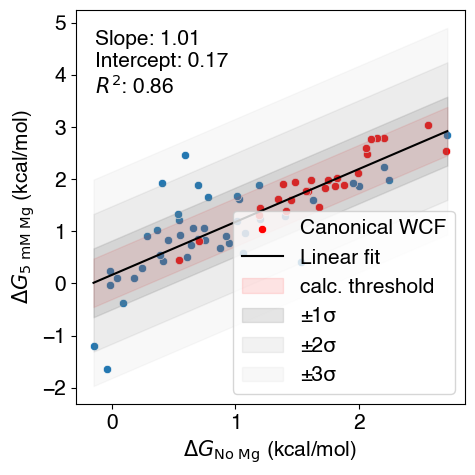

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=df_merged_AC_dG,
    x='dG_nomg',
    y='dG_mg',
    ax=ax
)

# plot threshold scatter points in different color
sns.scatterplot(
    data=df_canonical,
    x='dG_nomg',
    y='dG_mg',
    ax=ax, color='red',
    label='Canonical WCF'
)

# Regression line
x_line = np.linspace(df_merged_AC_dG['dG_nomg'].min(), df_merged_AC_dG['dG_nomg'].max(), 200)
y_line = intercept + slope * x_line
ax.plot(x_line, y_line, color='black', label='Linear fit')

# ±1σ band
ax.fill_between(
    x_line,
    y_line - threshold,
    y_line + threshold,
    color='red',
    alpha=0.1,
    label='calc. threshold'
)


# ±1σ band
ax.fill_between(
    x_line,
    y_line - sigma,
    y_line + sigma,
    color='gray',
    alpha=0.2,
    label='±1σ'
)

# ±2σ band
ax.fill_between(
    x_line,
    y_line - 2*sigma,
    y_line + 2*sigma,
    color='gray',
    alpha=0.1,
    label='±2σ'
)

# ±3σ band
ax.fill_between(
    x_line,
    y_line - 3*sigma,
    y_line + 3*sigma,
    color='gray',
    alpha=0.05,
    label='±3σ'
)


ax.set_xlabel(r'$\Delta G_{\text{No Mg}}$ (kcal/mol)')
ax.set_ylabel(r'$\Delta G_{\text{5 mM Mg}}$ (kcal/mol)')

# annotate slope, intercept, r2
ax.text(
    0.05, 0.95,
    f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\n$R^2$: {r2:.2f}',
    transform=ax.transAxes,
    verticalalignment='top'
    )

# legend bottom right
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("exports/dG_nomg_v_dG_mg_p4p6_AC_1sigma_calc.pdf")
plt.show()

In [35]:
fourU_correlation = pd.read_csv("exports/dG_nomg_v_dG_mg_p4p6_AC_with_residuals_canonical_annot.csv")


In [69]:
hiv_data = pd.read_csv("exports/hiv_calc_dG_manual_mean.csv")
other_var = 'dG_a35g'

# filter to only dG_wt and dG_a35 columns then dropna
hiv_data = hiv_data[['site_nt', 'dG_wt', other_var]].dropna()

# calculate ddG
hiv_data['ddG'] = hiv_data[other_var] - hiv_data['dG_wt']

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    hiv_data['dG_wt'],
    hiv_data[other_var]
)

# Predicted y-values
x = hiv_data['dG_wt']
y_pred = intercept + slope * x

# Residuals
residuals = hiv_data[other_var] - y_pred
# Standard deviation of residuals (σ)
sigma = residuals.std()

# R2 value
r2 = r_value**2
r2

slope, intercept, sigma

sigma2 = 0.5

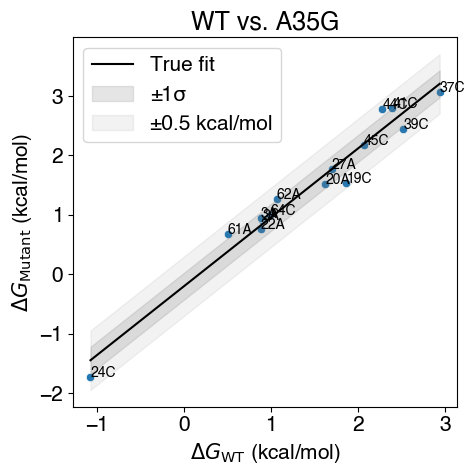

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=hiv_data,
    x='dG_wt',
    y=other_var,
    ax=ax
)

# Regression line
x_line = np.linspace(hiv_data['dG_wt'].min(), hiv_data['dG_wt'].max(), 200)
y_line = intercept + slope * x_line
ax.plot(x_line, y_line, color='black', label='True fit')


# ±1σ band
ax.fill_between(
    x_line,
    y_line - sigma,
    y_line + sigma,
    color='gray',
    alpha=0.2,
    label='±1σ'
)
# sigma2
ax.fill_between(
    x_line,
    y_line - sigma2,
    y_line + sigma2,
    color='gray',
    alpha=0.1,
    label='±0.5 kcal/mol'
)


# annotate each scatter point with site_nt
for _, row in hiv_data.iterrows():
    ax.text(row['dG_wt'], row[other_var], str(row['site_nt']), fontsize=10)

ax.set_xlabel(r'$\Delta G_{\text{WT}}$ (kcal/mol)')
ax.set_ylabel(r'$\Delta G_{\text{Mutant}}$ (kcal/mol)')

# set title based on other_var
if other_var == 'dG_a35g':
    title = 'WT vs. A35G'
elif other_var == 'dG_c30u':
    title = 'WT vs. C30U'
elif other_var == 'dG_gs':
    title = 'WT vs. UUCG (GS)'
elif other_var == 'dG_es2':
    title = 'WT vs. UUCG (ES2)'
ax.set_title(title)

ax.legend()
# save
plt.tight_layout()
#plt.savefig(f"exports/dG_wt_v_{other_var}_hiv.pdf")

In [53]:
# Define the regions
regions = {
    'lower_stem': [19, 20, 41, 44, 45],
    'upper_stem': [27, 29, 37, 39],
    'tribulge': [22, 24],
    'apical_loop': [30, 33, 35]
}

/var/folders/k7/k3x4cyj90rz6_py6pr8yth9m0000gn/T/ipykernel_31098/1466194326.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right')
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


1σ: 0.33 kcal/mol
2σ: 0.66 kcal/mol


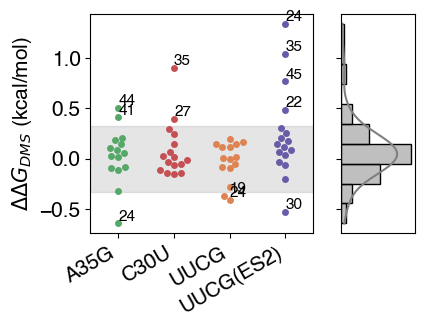

In [111]:
# swarmplot of ddG values (v1)
hiv_data = pd.read_csv("exports/hiv_calc_dG_manual_mean.csv")

hiv_data['ddG_a35g'] = hiv_data['dG_a35g'] - hiv_data['dG_wt']
hiv_data['ddG_c30u'] = hiv_data['dG_c30u'] - hiv_data['dG_wt']
hiv_data['ddG_gs'] = hiv_data['dG_gs'] - hiv_data['dG_wt']
hiv_data['ddG_es2'] = hiv_data['dG_es2'] - hiv_data['dG_wt']

# melt the dataframe to long format (ddG)
hiv_data_melted = hiv_data.melt(
    id_vars=['site', 'site_nt', 'dG_wt'],
    value_vars=['ddG_a35g', 'ddG_c30u', 'ddG_gs', 'ddG_es2'],
    var_name='Mutation',
    value_name='ddG'
).dropna()

# replace ddG_a35g with A35G, ddG_c30u with C30U, ddG_gs with GS, ddG_es2 with ES2
hiv_data_melted['Mutation'] = hiv_data_melted['Mutation'].replace({
    'ddG_a35g': 'A35G',
    'ddG_c30u': 'C30U',
    'ddG_gs': 'UUCG',
    'ddG_es2': 'UUCG(ES2)'
})

# annotate regions based on dict
hiv_data_melted['Region'] = hiv_data_melted['site'].apply(lambda x: next(
    (region for region, sites in regions.items() if x in sites), 'Other'))

# calculate 1 sigma
sigma_1 = np.std(hiv_data_melted['ddG'], ddof=1)   # 1σ
# sigma_2
sigma_2 = 2 * sigma_1
print(f"1σ: {sigma_1:.2f} kcal/mol")
print(f"2σ: {sigma_2:.2f} kcal/mol")
# swarmplot with region-specific markers
region_markers = {
    'lower_stem': 'o',
    'upper_stem': 's',
    'tribulge': 'D',
    'apical_loop': 'X',
    'Other': '^'
}



# colors gs: de8452, a35g: 55a868, c30u: c54f53, uucg es2: 685ca8, wt: 4d73b1

palette = {
    'A35G': '#55a868',
    'C30U': '#c54f53',
    'UUCG': '#de8452',
    'UUCG(ES2)': '#685ca8'
}

fig, axs = plt.subplots(1, 2, figsize=(4.5, 3.5), sharey = True, gridspec_kw={'width_ratios': [3, 1]})
for mut in hiv_data_melted["Mutation"].unique():
    subset = hiv_data_melted[hiv_data_melted["Mutation"] == mut]
    sns.swarmplot(
        data=subset,
        x='Mutation',
        y='ddG',
        dodge=True,
        color = palette[mut],
        ax=axs[0]
    )

# annotate sites outside of 1 sigma on swarmplot
for _, row in hiv_data_melted.iterrows():
    if abs(row['ddG']) > sigma_1:
        axs[0].text(
            x=row['Mutation'],
            y=row['ddG'],
            s=str(row['site']),
            fontsize=11,
            ha='left',
            va='bottom'
        )

# shade ±1 sigma
axs[0].axhspan(-sigma_1, sigma_1, color='gray', alpha=0.2, label='±1σ')

# drop xaxis label for axs[0]
axs[0].set_xlabel('')

# rotate xtick labels for axs[0]
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right')

# on axs[1], histogram of all ddG values with 1sigma shaded, vertical
sns.histplot(
    data=hiv_data_melted,
    y='ddG',
    bins=10,
    kde=True,
    color='gray',
    ax=axs[1]
)


# drop xaxis labels for axs[1]
axs[1].set_xlabel('')
# drop ticks for xaxis
axs[1].set_xticks([])

handles = [
    plt.Line2D(
        [0], [0],
        marker=region_markers.get(region, 'o'),
        color='w',
        label=region,
        markerfacecolor=palette.get(region, 'gray'),
        markersize=6,
        linestyle=''
    )
    for region in hiv_data_melted['Region'].unique()
]
#plt.legend(title='Region', handles=handles)
# set ylabel
axs[0].set_ylabel(r'$\Delta\Delta G_{DMS}$ (kcal/mol)')

plt.tight_layout()
plt.savefig("exports/hiv_ddG_swarmplot.pdf")

1σ: 0.33 kcal/mol
2σ: 0.66 kcal/mol


/var/folders/k7/k3x4cyj90rz6_py6pr8yth9m0000gn/T/ipykernel_31098/346988089.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')


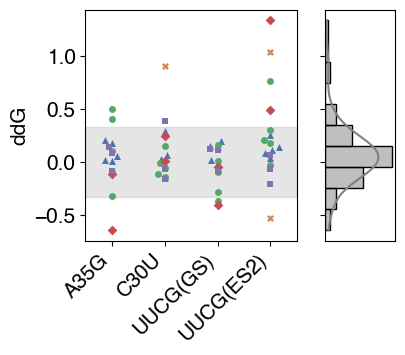

In [ ]:
# swarmplot of ddG values (v2)
hiv_data = pd.read_csv("exports/hiv_calc_dG_manual_mean.csv")

hiv_data['ddG_a35g'] = hiv_data['dG_a35g'] - hiv_data['dG_wt']
hiv_data['ddG_c30u'] = hiv_data['dG_c30u'] - hiv_data['dG_wt']
hiv_data['ddG_gs'] = hiv_data['dG_gs'] - hiv_data['dG_wt']
hiv_data['ddG_es2'] = hiv_data['dG_es2'] - hiv_data['dG_wt']

# melt the dataframe to long format (ddG)
hiv_data_melted = hiv_data.melt(
    id_vars=['site', 'site_nt', 'dG_wt'],
    value_vars=['ddG_a35g', 'ddG_c30u', 'ddG_gs', 'ddG_es2'],
    var_name='Mutation',
    value_name='ddG'
).dropna()

# replace ddG_a35g with A35G, ddG_c30u with C30U, ddG_gs with GS, ddG_es2 with ES2
hiv_data_melted['Mutation'] = hiv_data_melted['Mutation'].replace({
    'ddG_a35g': 'A35G',
    'ddG_c30u': 'C30U',
    'ddG_gs': 'UUCG(GS)',
    'ddG_es2': 'UUCG(ES2)'
})

# annotate regions based on dict
hiv_data_melted['Region'] = hiv_data_melted['site'].apply(lambda x: next(
    (region for region, sites in regions.items() if x in sites), 'Other'))

# calculate 1 sigma
sigma_1 = np.std(hiv_data_melted['ddG'], ddof=1)   # 1σ
# sigma_2
sigma_2 = 2 * sigma_1
print(f"1σ: {sigma_1:.2f} kcal/mol")
print(f"2σ: {sigma_2:.2f} kcal/mol")
# swarmplot with region-specific markers
region_markers = {
    'lower_stem': 'o',
    'upper_stem': 's',
    'tribulge': 'D',
    'apical_loop': 'X',
    'Other': '^'
}

palette = dict(zip(
    sorted(hiv_data_melted['Region'].unique()),
    sns.color_palette('deep', n_colors=hiv_data_melted['Region'].nunique())
))

fig, axs = plt.subplots(1, 2, figsize=(4, 3), sharey = True, gridspec_kw={'width_ratios': [3, 1]})
for region in hiv_data_melted["Region"].unique():
    subset = hiv_data_melted[hiv_data_melted["Region"] == region]
    sns.swarmplot(
        data=subset,
        x='Mutation',
        y='ddG',
        dodge=True,
        marker=region_markers.get(region, 'o'),
        color=palette.get(region)
        , ax=axs[0]
    )

# shade ±1 sigma
axs[0].axhspan(-sigma_1, sigma_1, color='gray', alpha=0.2, label='±1σ')

# drop xaxis label for axs[0]
axs[0].set_xlabel('')

# rotate xtick labels for axs[0]
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# on axs[1], histogram of all ddG values with 1sigma shaded, vertical
sns.histplot(
    data=hiv_data_melted,
    y='ddG',
    bins=10,
    kde=True,
    color='gray',
    ax=axs[1]
)
# drop xaxis labels for axs[1]
axs[1].set_xlabel('')
# drop ticks for xaxis
axs[1].set_xticks([])

handles = [
    plt.Line2D(
        [0], [0],
        marker=region_markers.get(region, 'o'),
        color='w',
        label=region,
        markerfacecolor=palette.get(region, 'gray'),
        markersize=6,
        linestyle=''
    )
    for region in hiv_data_melted['Region'].unique()
]
#plt.legend(title='Region', handles=handles)

In [73]:
hiv_data_melted

,site,site_nt,dG_wt,Mutation,ddG,Region
0,2,2A,0.895961,A35G,0.021679,Other
1,3,3A,0.882798,A35G,0.059612,Other
2,19,19C,1.862911,A35G,-0.322655,lower_stem
3,20,20A,1.620537,A35G,-0.095271,lower_stem
4,22,22A,0.878137,A35G,-0.112463,tribulge
...,...,...,...,...,...,...
71,44,44C,2.277397,ES2,-0.030326,lower_stem
72,45,45C,2.062493,ES2,0.767614,lower_stem
73,61,61A,0.499097,ES2,0.089819,Other
74,62,62A,1.062496,ES2,0.116691,Other
